In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier
D = pd.read_csv('train.csv').drop(columns=['id'])

In [ ]:
D.isnull().any() # checking for nulls

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
#checking for correlation 
cory = D.corr()
cory['quality'].abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.446329
volatile acidity        0.305942
total sulfur dioxide    0.205930
sulphates               0.195131
density                 0.153139
citric acid             0.138978
fixed acidity           0.096782
chlorides               0.094426
free sulfur dioxide     0.039615
residual sugar          0.014989
pH                      0.009524
Name: quality, dtype: float64

In [ ]:
#it seems that Chlorides, fixed acidity, residual sugar, free sulfer dioxide, and ph have the lowest correlation
#all these features will be dropped to increase accuracy
D.drop(columns=['chlorides','fixed acidity','residual sugar','free sulfur dioxide','pH'], inplace=True)

In [ ]:
# removing outliers to avoid dealing with potiential errors and anomalies 
#code checks for outliers and removes them
#if there are none then none shall be removed
z = np.abs(stats.zscore(D))
D = D[(z < 3).all(axis=1)]

In [ ]:
target = D.columns[6]
features = D.columns[:].drop(target)
X = D.loc[:, features]
Y = D.loc[:, target]
# Standardaizing the data
X = preprocessing.StandardScaler().fit(X).transform(X)

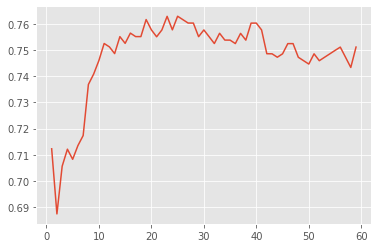

In [ ]:
#testing metric on 60 k neighbors 
kneighbors = range(1, 60)
scores = []

for k in kneighbors:
  knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean', weights='uniform')
  score = cross_val_score(knn, X, Y, cv=10, scoring='accuracy') 
  scores.append(score.mean())
  
plt.plot(kneighbors, scores)


In [ ]:
print(np.array(scores).argmax())
print(np.array(scores).max())
newArr = np.delete(np.array(scores), 0)
print(np.array(newArr).argmax())

24
0.7629015721120984
23


In [ ]:
#because of issues with RNG in the train_test_spit method
# 10k runs to get the best performing set

max = 0
dataSplits = []
index = 0
kneighbors = range(1, 2)

for k in kneighbors:
  for i in range(10):
    dataStuff = train_test_split( X, Y, test_size=0.2)
    dataSplits.append(dataStuff)
    X_train, X_vlad, Y_train, Y_vlad = dataStuff

    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean', weights='distance')
    knn.fit(X_train,Y_train)
    predict = knn.predict(X_vlad)
    
    F1 = f1_score(Y_vlad,predict)
    if(max < F1):
      max = F1
      index = i
    print(F1)


0.7499999999999999
0.7840909090909092
0.6941176470588235
0.7151515151515152
0.7080745341614907
0.7044025157232704
0.7710843373493975
0.7037037037037036
0.6826347305389222
0.7272727272727273


In [ ]:
#once the best performing set is chosen
#use it to fit a new model and use it for the test cases
X_train, X_test, Y_train, Y_vlad = dataSplits[index]
k = KNeighborsClassifier(n_neighbors=24,metric='euclidean', weights='distance')

k.fit(X_train,Y_train)
predict = k.predict(X_test)
sc = accuracy_score(Y_vlad, predict)
F1 = f1_score(Y_vlad,predict)
AUC = roc_auc_score(Y_vlad,predict)
print(sc)
print(F1)
print(AUC)

0.8961038961038961
0.9130434782608696
0.8901098901098902


In [ ]:
uploaded = files.upload()

Saving test.csv to test (2).csv


In [ ]:
T1 = pd.read_csv('test.csv').drop(columns=['id'])
#T1.drop(columns=['fixed acidity','chlorides','residual sugar','free sulfur dioxide','pH'], inplace=True)
T1.drop(columns=['chlorides','fixed acidity','residual sugar','free sulfur dioxide','pH'], inplace=True)
#X = preprocessing.minmax_scale(X)
T1 = preprocessing.StandardScaler().fit(T1).transform(T1)
T1.shape

(800, 6)

In [ ]:

predict = k.predict(T1)
final = pd.read_csv('test.csv')
final_data = pd.DataFrame({'id':final.id,'quality':predict})
final_data.to_csv('Final_submit.csv',index=False)

In [ ]:
files.download("Final_submit.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>